In [3]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')


In [4]:
# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

In [5]:
# Read the Mouse and Drug Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
mouse_drug_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [6]:
#Read the Clinical Trial Data 
ClinicalTrial_df = pd.read_csv(clinical_trial_data_to_load)
ClinicalTrial_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [7]:
# Combine the data into a single dataset 
Data = [mouse_drug_df, ClinicalTrial_df]
combined_data = pd.merge(mouse_drug_df, ClinicalTrial_df, on="Mouse ID", how="outer")
combined_data

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


In [8]:
combined_data.count()

Mouse ID              1906
Drug                  1906
Timepoint             1906
Tumor Volume (mm3)    1906
Metastatic Sites      1906
dtype: int64

## Tumor Response to Treatment

In [9]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
combined_datagroup = combined_data.groupby(["Drug", "Timepoint"])
mean_TumorVolume = combined_datagroup["Tumor Volume (mm3)"].mean()
# Convert to DataFrame
meanTumorVolume_df = pd.DataFrame({"Mean Tumor Volume": mean_TumorVolume})
# Preview DataFrame
meanTumorVolume_df


Mean Tumor Volume
Drug      Timepoint                   
Capomulin 0                  45.000000
          5                  44.266086
          10                 43.084291
          15                 42.064317
          20                 40.716325
          25                 39.939528
          30                 38.769339
          35                 37.816839
          40                 36.958001
          45                 36.236114
Ceftamin  0                  45.000000
          5                  46.503051
          10                 48.285125
          15                 50.094055
          20                 52.157049
          25                 54.287674
          30                 56.769517
          35                 58.827548
          40                 61.467895
          45                 64.132421
Infubinol 0                  45.000000
          5                  47.062001
          10                 49.403909
          15                 51.296397
          20                 53.197691
          25                 55.715252
          30                 58.299397
          35                 60.742461
          40                 63.162824
          45                 65.755562
...                                ...
Ramicane  0                  45.000000
          5                  43.944859
          10                 42.531957
          15                 41.495061
          20                 40.238325
          25                 38.974300
          30                 38.703137
          35                 37.451996
          40                 36.574081
          45                 34.955595
Stelasyn  0                  45.000000
          5                  47.527452
          10                 49.463844
          15                 51.529409
          20                 54.067395
          25                 56.166123
          30                 59.826738
          35                 62.440699
          40                 65.356386
          45                 68.438310
Zoniferol 0                  45.000000
          5                  46.851818
          10                 48.689881
          15                 50.779059
          20                 53.170334
          25                 55.432935
          30                 57.713531
          35                 60.089372
          40                 62.916692
          45                 65.960888

[100 rows x 1 columns]

In [10]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
# Preview DataFrame
combined_datagroup = combined_data.groupby(["Drug", "Timepoint"])
TumorVolume_Stderror = combined_datagroup["Tumor Volume (mm3)"].sem()
TumorVolume_Stderror_df = pd.DataFrame({"Standar Error": TumorVolume_Stderror})
TumorVolume_Stderror_df

Standar Error
Drug      Timepoint               
Capomulin 0               0.000000
          5               0.448593
          10              0.702684
          15              0.838617
          20              0.909731
          25              0.881642
          30              0.934460
          35              1.052241
          40              1.223608
          45              1.223977
Ceftamin  0               0.000000
          5               0.164505
          10              0.236144
          15              0.332053
          20              0.359482
          25              0.439356
          30              0.490620
          35              0.692248
          40              0.708505
          45              0.902358
Infubinol 0               0.000000
          5               0.235102
          10              0.282346
          15              0.357705
          20              0.476210
          25              0.550315
          30              0.631061
          35              0.984155
          40              1.055220
          45              1.144427
...                            ...
Ramicane  0               0.000000
          5               0.482955
          10              0.720225
          15              0.770432
          20              0.786199
          25              0.746991
          30              0.864906
          35              0.967433
          40              1.128445
          45              1.226805
Stelasyn  0               0.000000
          5               0.239862
          10              0.433678
          15              0.493261
          20              0.621889
          25              0.741922
          30              0.899548
          35              1.003186
          40              1.410435
          45              1.576556
Zoniferol 0               0.000000
          5               0.188950
          10              0.263949
          15              0.370544
          20              0.533182
          25              0.602513
          30              0.800043
          35              0.881426
          40              0.998515
          45              1.003576

[100 rows x 1 columns]

In [11]:
# Minor Data Munging to Re-Format the Data Frames
#scaning for missing values
combined_data = pd.merge(mouse_drug_df, ClinicalTrial_df, on="Mouse ID", how="outer")
sum(combined_data["Tumor Volume (mm3)"].isnull())
sum(combined_data["Mouse ID"].isnull())
sum(combined_data["Timepoint"].isnull())
sum(combined_data["Drug"].isnull())

0

In [12]:
#making the Timepoint our index as we transpose the Drug colume
mean_TumorVolume = mean_TumorVolume.reset_index()
meanTumourVol_pivot = mean_TumorVolume.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

TumorVolume_Stderror = TumorVolume_Stderror.reset_index()
TumorVolumeerror_pivot = TumorVolume_Stderror.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

# Preview that Reformatting worked
meanTumourVol_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


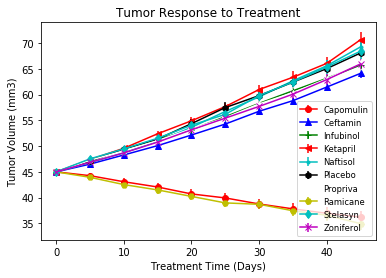

In [13]:
# Generate the Plot (with Error Bars)
plt.errorbar(meanTumourVol_pivot.index, meanTumourVol_pivot["Capomulin"], yerr=TumorVolumeerror_pivot["Capomulin"], color="r", marker="o", markersize=6)
plt.errorbar(meanTumourVol_pivot.index, meanTumourVol_pivot["Ceftamin"], yerr=TumorVolumeerror_pivot["Ceftamin"], color="b", marker="^", markersize=6)
plt.errorbar(meanTumourVol_pivot.index, meanTumourVol_pivot["Infubinol"], yerr=TumorVolumeerror_pivot["Infubinol"], color="g", marker="+", markersize=6)
plt.errorbar(meanTumourVol_pivot.index, meanTumourVol_pivot["Ketapril"], yerr=TumorVolumeerror_pivot["Ketapril"], color="r", marker="<", markersize=6)
plt.errorbar(meanTumourVol_pivot.index, meanTumourVol_pivot["Naftisol"], yerr=TumorVolumeerror_pivot["Naftisol"], color="c", marker=".", markersize=6)
plt.errorbar(meanTumourVol_pivot.index, meanTumourVol_pivot["Placebo"], yerr=TumorVolumeerror_pivot["Placebo"], color="k", marker="h", markersize=6)
plt.errorbar(meanTumourVol_pivot.index, meanTumourVol_pivot["Propriva"], yerr=TumorVolumeerror_pivot["Propriva"], color="w", marker="*", markersize=6)
plt.errorbar(meanTumourVol_pivot.index, meanTumourVol_pivot["Ramicane"], yerr=TumorVolumeerror_pivot["Ramicane"], color="y", marker="H", markersize=6)
plt.errorbar(meanTumourVol_pivot.index, meanTumourVol_pivot["Stelasyn"], yerr=TumorVolumeerror_pivot["Stelasyn"], color="c", marker="d", markersize=6)
plt.errorbar(meanTumourVol_pivot.index, meanTumourVol_pivot["Zoniferol"], yerr=TumorVolumeerror_pivot["Zoniferol"], color="m", marker="x", markersize=6)

plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Treatment Time (Days)")
plt.grid(False)
plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
#plt.savefig("analysis/Fig1.png")D:\BootCamp\UKED201811DATA5
plt.savefig('fig1.png', bbox_inches='tight')
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [14]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
combined_datagroup = combined_data.groupby(["Drug", "Timepoint"])
mean_MetastaticSites = combined_datagroup["Metastatic Sites"].mean()
# Convert to DataFrame
meanMetastaticSites_df = pd.DataFrame({"Mean metastatic": mean_MetastaticSites})
meanMetastaticSites_df
# Preview DataFrame


Mean metastatic
Drug      Timepoint                 
Capomulin 0                 0.000000
          5                 0.160000
          10                0.320000
          15                0.375000
          20                0.652174
          25                0.818182
          30                1.090909
          35                1.181818
          40                1.380952
          45                1.476190
Ceftamin  0                 0.000000
          5                 0.380952
          10                0.600000
          15                0.789474
          20                1.111111
          25                1.500000
          30                1.937500
          35                2.071429
          40                2.357143
          45                2.692308
Infubinol 0                 0.000000
          5                 0.280000
          10                0.666667
          15                0.904762
          20                1.050000
          25                1.277778
          30                1.588235
          35                1.666667
          40                2.100000
          45                2.111111
...                              ...
Ramicane  0                 0.000000
          5                 0.120000
          10                0.250000
          15                0.333333
          20                0.347826
          25                0.652174
          30                0.782609
          35                0.952381
          40                1.100000
          45                1.250000
Stelasyn  0                 0.000000
          5                 0.240000
          10                0.478261
          15                0.782609
          20                0.952381
          25                1.157895
          30                1.388889
          35                1.562500
          40                1.583333
          45                1.727273
Zoniferol 0                 0.000000
          5                 0.166667
          10                0.500000
          15                0.809524
          20                1.294118
          25                1.687500
          30                1.933333
          35                2.285714
          40                2.785714
          45                3.071429

[100 rows x 1 columns]

In [15]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint
# Convert to DataFrame
# Preview DataFrame
Stderror_Metastaticsite = combined_datagroup["Metastatic Sites"].sem()
Stderror_Metastatics_df = pd.DataFrame({"Standar ErrorM": Stderror_Metastaticsite})
Stderror_Metastatics_df


Standar ErrorM
Drug      Timepoint                
Capomulin 0                0.000000
          5                0.074833
          10               0.125433
          15               0.132048
          20               0.161621
          25               0.181818
          30               0.172944
          35               0.169496
          40               0.175610
          45               0.202591
Ceftamin  0                0.000000
          5                0.108588
          10               0.152177
          15               0.180625
          20               0.241034
          25               0.258831
          30               0.249479
          35               0.266526
          40               0.289128
          45               0.286101
Infubinol 0                0.000000
          5                0.091652
          10               0.159364
          15               0.194015
          20               0.234801
          25               0.265753
          30               0.227823
          35               0.224733
          40               0.314466
          45               0.309320
...                             ...
Ramicane  0                0.000000
          5                0.066332
          10               0.090289
          15               0.115261
          20               0.119430
          25               0.119430
          30               0.139968
          35               0.145997
          40               0.160591
          45               0.190221
Stelasyn  0                0.000000
          5                0.087178
          10               0.123672
          15               0.153439
          20               0.200905
          25               0.219824
          30               0.230641
          35               0.240983
          40               0.312815
          45               0.359062
Zoniferol 0                0.000000
          5                0.077709
          10               0.109109
          15               0.111677
          20               0.166378
          25               0.236621
          30               0.248168
          35               0.285714
          40               0.299791
          45               0.286400

[100 rows x 1 columns]

In [16]:
# Minor Data Munging to Re-Format the Data Frames
sum(combined_data["Metastatic Sites"].isnull())
# Preview that Reformatting worked
mean_MetastaticSites = mean_MetastaticSites.reset_index()
mean_MetastaticSites_pivot = mean_MetastaticSites.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

MetastaticSites_Stderror = Stderror_Metastaticsite.reset_index()
MetastaticSiteserror_pivot = MetastaticSites_Stderror.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

# Preview that Reformatting worked
mean_MetastaticSites_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


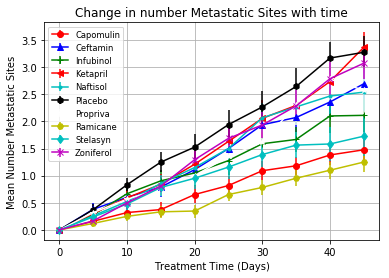

In [17]:
# Generate the Plot (with Error Bars)
plt.errorbar(mean_MetastaticSites_pivot.index, mean_MetastaticSites_pivot["Capomulin"], yerr=MetastaticSiteserror_pivot["Capomulin"], color="r", marker="o", markersize=6)
plt.errorbar(mean_MetastaticSites_pivot.index, mean_MetastaticSites_pivot["Ceftamin"], yerr=MetastaticSiteserror_pivot["Ceftamin"], color="b", marker="^", markersize=6)
plt.errorbar(mean_MetastaticSites_pivot.index, mean_MetastaticSites_pivot["Infubinol"], yerr=MetastaticSiteserror_pivot["Infubinol"], color="g", marker="+", markersize=6)
plt.errorbar(mean_MetastaticSites_pivot.index, mean_MetastaticSites_pivot["Ketapril"], yerr=MetastaticSiteserror_pivot["Ketapril"], color="r", marker="<", markersize=6)
plt.errorbar(mean_MetastaticSites_pivot.index, mean_MetastaticSites_pivot["Naftisol"], yerr=MetastaticSiteserror_pivot["Naftisol"], color="c", marker=".", markersize=6)
plt.errorbar(mean_MetastaticSites_pivot.index, mean_MetastaticSites_pivot["Placebo"], yerr=MetastaticSiteserror_pivot["Placebo"], color="k", marker="h", markersize=6)
plt.errorbar(mean_MetastaticSites_pivot.index, mean_MetastaticSites_pivot["Propriva"], yerr=MetastaticSiteserror_pivot["Propriva"], color="w", marker="*", markersize=6)
plt.errorbar(mean_MetastaticSites_pivot.index, mean_MetastaticSites_pivot["Ramicane"], yerr=MetastaticSiteserror_pivot["Ramicane"], color="y", marker="H", markersize=6)
plt.errorbar(mean_MetastaticSites_pivot.index, mean_MetastaticSites_pivot["Stelasyn"], yerr=MetastaticSiteserror_pivot["Stelasyn"], color="c", marker="d", markersize=6)
plt.errorbar(mean_MetastaticSites_pivot.index, mean_MetastaticSites_pivot["Zoniferol"], yerr=MetastaticSiteserror_pivot["Zoniferol"], color="m", marker="x", markersize=6)

plt.title("Change in number Metastatic Sites with time")
plt.ylabel("Mean Number Metastatic Sites")
plt.xlabel("Treatment Time (Days)")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
#plt.savefig("analysis/Fig1.png")D:\BootCamp\UKED201811DATA5
plt.savefig('fig2.png', bbox_inches='tight')
# Show the Figure
plt.show()

## Survival Rates

In [18]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
combined_data = pd.merge(mouse_drug_df, ClinicalTrial_df, on="Mouse ID", how="outer")
group_data = combined_data.groupby(["Drug", "Timepoint"])
Mouse_count = group_data.count()["Mouse ID"]

Mouse_survivalcount = pd.DataFrame({"Mouse Count": Mouse_count})
# Preview DataFrame
Mouse_survivalcount

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23
          25                  22
          30                  22
          35                  22
          40                  21
          45                  21
Ceftamin  0                   25
          5                   21
          10                  20
          15                  19
          20                  18
          25                  18
          30                  16
          35                  14
          40                  14
          45                  13
Infubinol 0                   25
          5                   25
          10                  21
          15                  21
          20                  20
          25                  18
          30                  17
          35                  12
          40                  10
          45                   9
...                          ...
Ramicane  0                   25
          5                   25
          10                  24
          15                  24
          20                  23
          25                  23
          30                  23
          35                  21
          40                  20
          45                  20
Stelasyn  0                   26
          5                   25
          10                  23
          15                  23
          20                  21
          25                  19
          30                  18
          35                  16
          40                  12
          45                  11
Zoniferol 0                   25
          5                   24
          10                  22
          15                  21
          20                  17
          25                  16
          30                  15
          35                  14
          40                  14
          45                  14

[100 rows x 1 columns]

In [19]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
Mouse_Count = Mouse_survivalcount.reset_index()
pivot_mousecount = Mouse_Count.pivot(index="Timepoint", columns="Drug")["Mouse Count"]

# Preview the Data Frame
pivot_mousecount

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


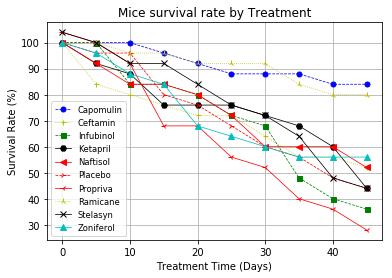

In [20]:
# Generate the Plot (Accounting for percentages)
plt.plot(pivot_mousecount["Capomulin"] / 25 * 100, "bo", markersize=5, linewidth=0.75, linestyle="dashed")
plt.plot(pivot_mousecount["Ceftamin"] / 25* 100, "y+", markersize=5, linewidth=0.75, linestyle="dotted")
plt.plot(pivot_mousecount["Infubinol"] / 25* 100, "gs", markersize=5, linewidth=0.75, linestyle="dashed")
plt.plot(pivot_mousecount["Ketapril"] / 25* 100, "kH", markersize=6, linewidth=0.75, linestyle="solid")
plt.plot(pivot_mousecount["Naftisol"] / 25* 100, "r<", markersize=6, linewidth=0.75, linestyle="solid")
plt.plot(pivot_mousecount["Placebo"] / 25* 100, "r4", markersize=6, linewidth=0.75, linestyle="dashed")
plt.plot(pivot_mousecount["Propriva"] / 25* 100, "r3", markersize=6, linewidth=0.75, linestyle="solid")
plt.plot(pivot_mousecount["Ramicane"] / 25* 100, "y2", markersize=6, linewidth=0.75, linestyle="dotted")
plt.plot(pivot_mousecount["Stelasyn"] / 25* 100, "kx", markersize=6, linewidth=0.75, linestyle="solid")
plt.plot(pivot_mousecount["Zoniferol"] / 25* 100, "c^", markersize=6, linewidth=0.75, linestyle="solid")
plt.title("Mice survival rate by Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Treatment Time (Days)")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig('fig3.png', bbox_inches='tight')

# Show the Figure
plt.show()

## Summary Bar Graph

In [21]:
# Calculate the percent changes for each drug
#change by drug is calculated as the difference between tumor volume of dat o and day 45 for each drug
tumourpercent_change = (meanTumourVol_pivot.iloc[-1] - meanTumourVol_pivot.iloc[0])/meanTumourVol_pivot.iloc[0] *100

# Display the data to confirm
tumourpercent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

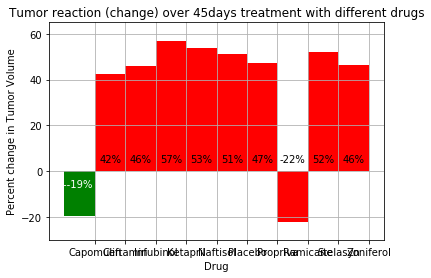

In [42]:
# Store all Relevant Percent Changes into a Tuple

tumor_change = (tumourpercent_change["Capomulin"], tumourpercent_change["Ceftamin"], tumourpercent_change["Infubinol"], tumourpercent_change["Ketapril"], tumourpercent_change["Naftisol"],
                 tumourpercent_change["Placebo"], tumourpercent_change["Propriva"], tumourpercent_change["Ramicane"], tumourpercent_change["Stelasyn"], tumourpercent_change["Zoniferol"])
tumor_change
# Splice the data between passing and failing drugs
#Creates a figure and only one subplot
fig, ax = plt.subplots()
ind = np.arange(len(tumor_change))
width = 1
drugtrail_Pass = ax.bar(ind[0], tumor_change[0], width, color='green')
drugtrail_Fail = ax.bar(ind[1:], tumor_change[1:], width, color='red')

# Orient widths. Add labels, tick marks, etc. 
ax.set_title('Tumor reaction (change) over 45days treatment with different drugs')
ax.set_ylabel('Percent change in Tumor Volume')
ax.set_xlabel('Drug')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,65])
ax.grid(True)

# Use functions to label the percentages of changes

def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="black")
        
# Call functions to implement the function calls
autolabelPass(drugtrail_Pass)
autolabelFail(drugtrail_Fail)

# Save the Figure
plt.savefig('fig4.png', bbox_inches='tight')

# Show the Figure
fig.show()

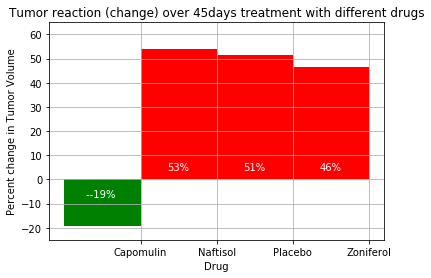

In [43]:
tumor_change = (tumourpercent_change["Capomulin"], tumourpercent_change["Naftisol"],
                 tumourpercent_change["Placebo"], tumourpercent_change["Zoniferol"])
tumor_change
fig, ax = plt.subplots()
ind = np.arange(len(tumor_change))
width = 1
drugtrail_Pass = ax.bar(ind[0], tumor_change[0], width, color='green')
drugtrail_Fail = ax.bar(ind[1:], tumor_change[1:], width, color='red')

# Orient widths. Add labels, tick marks, etc. 
ax.set_title('Tumor reaction (change) over 45days treatment with different drugs')
ax.set_ylabel('Percent change in Tumor Volume')
ax.set_xlabel('Drug')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin', 'Naftisol', 'Placebo', 'Zoniferol'))
ax.set_autoscaley_on(False)
ax.set_ylim([-25,65])
ax.grid(True)

# Use functions to label the percentages of changes

def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")


# Call functions to implement the function calls
autolabelPass(drugtrail_Pass)
autolabelFail(drugtrail_Fail)
                
#Save figure
plt.savefig('fig4copy.png', bbox_inches='tight')

# Show the Figure
fig.show()